# Draw Confusion Matrix
draw confusion martrix from saved .pt file.  
Notice: you should change the gait_cycle, sampling, and pref_path keyword first, then run all cells.

In [1]:
import torch 

gait_cycle = 'two stream'
sampling = 'over'
pref_path = "/workspace/skeleton/logs/two_stream/resnet/2024-06-15/3/09-11-19/best_preds"

label = torch.load(f"{pref_path}/resnet_{sampling}_0_label.pt")
pred = torch.load(f"{pref_path}/resnet_{sampling}_0_pred.pt")

In [2]:
# class label balance

a = 0
b = 0
c = 0 

for i in label:
    if i == 0:
        a += 1
    elif i == 1:
        b += 1
    elif i == 2:
        c += 1

print(a, b, c)

34903 25954 8303


In [3]:
from torchmetrics.classification import (
    MulticlassAccuracy,
    MulticlassPrecision,
    MulticlassRecall,
    MulticlassF1Score,
    MulticlassConfusionMatrix,
    MulticlassAUROC,
)



# define metrics 
num_class = 3
_accuracy = MulticlassAccuracy(num_class)
_precision = MulticlassPrecision(num_class)
_recall = MulticlassRecall(num_class)
_f1_score = MulticlassF1Score(num_class)
_auroc = MulticlassAUROC(num_class)
_confusion_matrix = MulticlassConfusionMatrix(num_class, normalize="true")


print('*' * 100)
print('accuracy: %s' % _accuracy(pred, label))
print('precision: %s' % _precision(pred, label))
print('_binary_recall: %s' % _recall(pred, label))
print('_binary_f1: %s' % _f1_score(pred, label))
print('_aurroc: %s' % _auroc(pred, label))
print('_confusion_matrix: %s' % _confusion_matrix(pred, label))
print('#' * 100)

****************************************************************************************************
accuracy: tensor(0.4593)
precision: tensor(0.5089)
_binary_recall: tensor(0.4593)
_binary_f1: tensor(0.4311)
_aurroc: tensor(0.8419)
_confusion_matrix: tensor([[0.9817, 0.0183, 0.0000],
        [0.6037, 0.3963, 0.0000],
        [0.9952, 0.0048, 0.0000]])
####################################################################################################


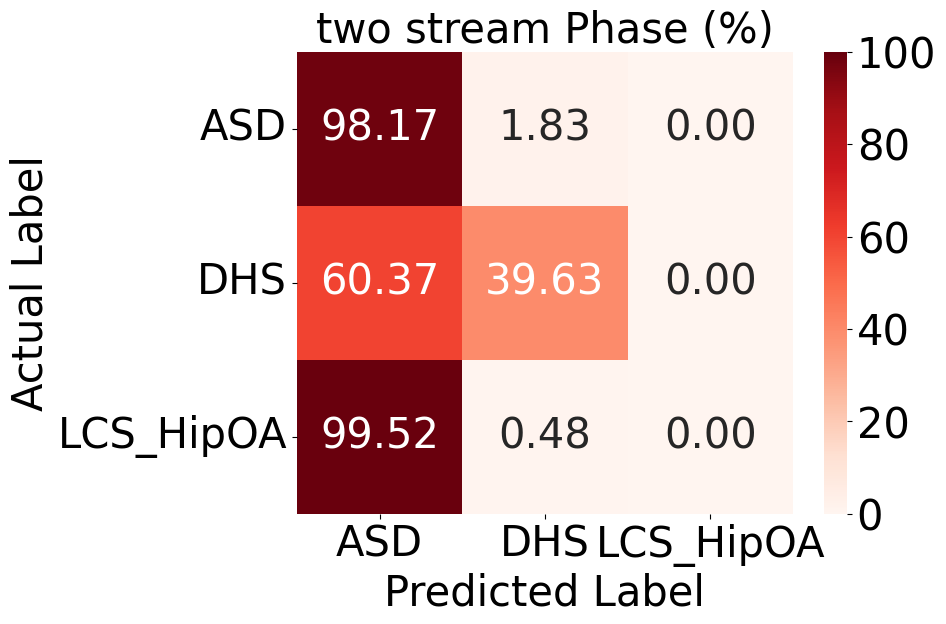

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# 设置字体和标题样式
plt.rcParams.update({'font.size': 30, 'font.family': 'sans-serif'})

# 假设的混淆矩阵数据
confusion_matrix_data = _confusion_matrix(pred, label).cpu().numpy() * 100

axis_labels = ['ASD', 'DHS', 'LCS_HipOA']

# 使用matplotlib和seaborn绘制混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_data, annot=True, fmt='.2f', cmap='Reds', xticklabels=axis_labels, yticklabels=axis_labels, vmin=0, vmax=100)
plt.title(f'{gait_cycle} Phase (%)', fontsize=30)
plt.ylabel('Actual Label', fontsize=30)
plt.xlabel('Predicted Label', fontsize=30)
plt.show()

In [5]:
# load all fold 
all_label = []
all_pred = []	

for i in range(3):
	label = torch.load(f"{pref_path}/resnet_{sampling}_{i}_label.pt")
	pred = torch.load(f"{pref_path}/resnet_{sampling}_{i}_pred.pt")
	all_label.append(label)
	all_pred.append(pred)
	

In [6]:
len(all_label), all_label[0].shape

(3, torch.Size([69160]))

In [7]:
all_label = torch.cat(all_label)
all_pred = torch.cat(all_pred)

In [8]:
all_label.shape, all_pred.shape

(torch.Size([239400]), torch.Size([239400, 3]))

****************************************************************************************************
accuracy: tensor(0.4111)
precision: tensor(0.8089)
_binary_recall: tensor(0.4111)
_binary_f1: tensor(0.3842)
_aurroc: tensor(0.7630)
_confusion_matrix: tensor([[9.9319e-01, 4.8727e-03, 1.9369e-03],
        [8.3655e-01, 1.6192e-01, 1.5262e-03],
        [9.2084e-01, 9.1708e-04, 7.8243e-02]])
####################################################################################################


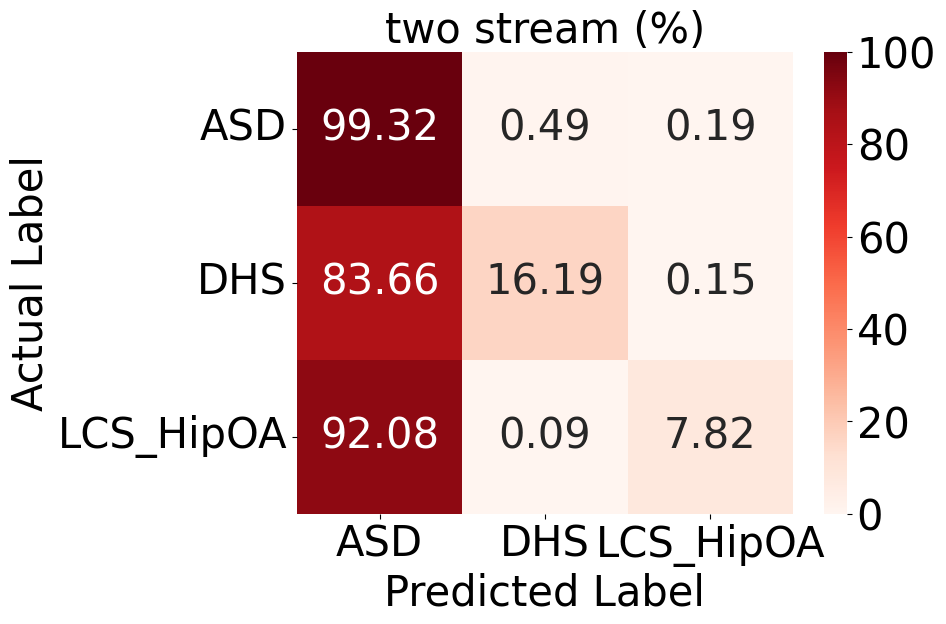

In [9]:
from torchmetrics.classification import (
    MulticlassAccuracy,
    MulticlassPrecision,
    MulticlassRecall,
    MulticlassF1Score,
    MulticlassConfusionMatrix,
    MulticlassAUROC,
)

# define metrics 
num_class = 3
_accuracy = MulticlassAccuracy(num_class)
_precision = MulticlassPrecision(num_class)
_recall = MulticlassRecall(num_class)
_f1_score = MulticlassF1Score(num_class)
_auroc = MulticlassAUROC(num_class)
_confusion_matrix = MulticlassConfusionMatrix(num_class, normalize="true")


print('*' * 100)
print('accuracy: %s' % _accuracy(all_pred, all_label))
print('precision: %s' % _precision(all_pred, all_label))
print('_binary_recall: %s' % _recall(all_pred, all_label))
print('_binary_f1: %s' % _f1_score(all_pred, all_label))
print('_aurroc: %s' % _auroc(all_pred, all_label))
print('_confusion_matrix: %s' % _confusion_matrix(all_pred, all_label))
print('#' * 100)

import matplotlib.pyplot as plt
import seaborn as sns

# 设置字体和标题样式
plt.rcParams.update({'font.size': 30, 'font.family': 'sans-serif'})

# 假设的混淆矩阵数据
confusion_matrix_data = _confusion_matrix(all_pred, all_label).cpu().numpy() * 100

axis_labels = ['ASD', 'DHS', 'LCS_HipOA']

# 使用matplotlib和seaborn绘制混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_data, annot=True, fmt='.2f', cmap='Reds', xticklabels=axis_labels, yticklabels=axis_labels, vmin=0, vmax=100)
plt.title(f'{gait_cycle} (%)', fontsize=30)
plt.ylabel('Actual Label', fontsize=30)
plt.xlabel('Predicted Label', fontsize=30)
plt.show()

# Draw CM by self

In [10]:
import torch 

# this result from mmaction2 ckpt.
cm = torch.tensor(
    [
		[128, 29, 53],
		[20, 49, 3],
		[106, 0, 116],
	]
)


In [11]:
manual_label = []
manual_pred = []

for i in range(cm.shape[0]):
		
	for j in range(cm.shape[1]):
		for k in range(cm[i][j]):
			manual_label.append(i)
			if j == 0:
				manual_pred.append([1.0, 0, 0])
			elif j == 1:
				manual_pred.append([0, 1., 0])
			elif j == 2:
				manual_pred.append([0, 0, 1.])

manual_label = torch.tensor(manual_label)
manual_pred = torch.tensor(manual_pred)

****************************************************************************************************
accuracy: tensor(0.6042)
precision: tensor(0.6022)
_binary_recall: tensor(0.6042)
_binary_f1: tensor(0.5980)
_aurroc: tensor(0.6864)
_confusion_matrix: tensor([[0.6095, 0.1381, 0.2524],
        [0.2778, 0.6806, 0.0417],
        [0.4775, 0.0000, 0.5225]])
####################################################################################################


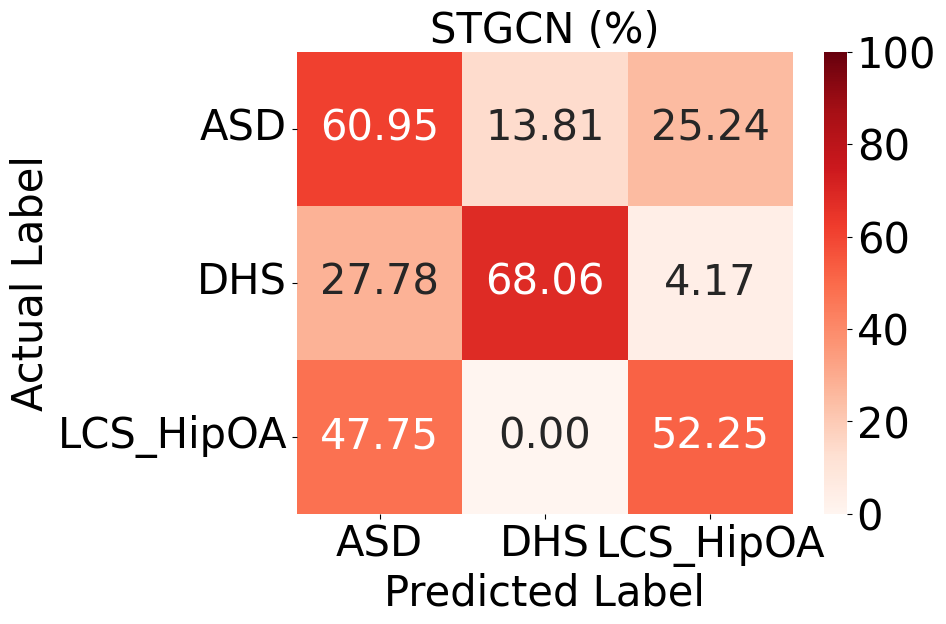

In [12]:
from torchmetrics.classification import (
    MulticlassAccuracy,
    MulticlassPrecision,
    MulticlassRecall,
    MulticlassF1Score,
    MulticlassConfusionMatrix,
    MulticlassAUROC,
)

# define metrics 
num_class = 3
_accuracy = MulticlassAccuracy(num_class)
_precision = MulticlassPrecision(num_class)
_recall = MulticlassRecall(num_class)
_f1_score = MulticlassF1Score(num_class)
_auroc = MulticlassAUROC(num_class)
_confusion_matrix = MulticlassConfusionMatrix(num_class, normalize="true")


print('*' * 100)
print('accuracy: %s' % _accuracy(manual_pred, manual_label))
print('precision: %s' % _precision(manual_pred, manual_label))
print('_binary_recall: %s' % _recall(manual_pred, manual_label))
print('_binary_f1: %s' % _f1_score(manual_pred, manual_label))
print('_aurroc: %s' % _auroc(manual_pred, manual_label))
print('_confusion_matrix: %s' % _confusion_matrix(manual_pred, manual_label))
print('#' * 100)

import matplotlib.pyplot as plt
import seaborn as sns

# 设置字体和标题样式
plt.rcParams.update({'font.size': 30, 'font.family': 'sans-serif'})

# 假设的混淆矩阵数据
confusion_matrix_data = _confusion_matrix(manual_pred, manual_label).cpu().numpy() * 100

axis_labels = ['ASD', 'DHS', 'LCS_HipOA']

# 使用matplotlib和seaborn绘制混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_data, annot=True, fmt='.2f', cmap='Reds', xticklabels=axis_labels, yticklabels=axis_labels, vmin=0, vmax=100)
plt.title(f'STGCN (%)', fontsize=30)
plt.ylabel('Actual Label', fontsize=30)
plt.xlabel('Predicted Label', fontsize=30)
plt.show()